In [1]:
import  matplotlib.pyplot as plt  
import  numpy as np
import math
from gurobipy import *
import os
import errno
from time import time
import pandas as pd
import random

In [2]:
instancia = open('C:\\Users\\Asus\\Desktop\\Libro1.csv')

In [3]:
print(instancia)

<_io.TextIOWrapper name='C:\\Users\\Asus\\Desktop\\Libro1.csv' mode='r' encoding='cp1252'>


In [4]:
contador=0
numeroNodos=100
nodos={}
contadory=0
contadorLinea=0
matrix={}
cubierto={}
for  line in instancia:
    if(contadorLinea>0):
        linea= line.split(';')
        for i in range(numeroNodos):
            nodos[contador]= {'x': i, 'y':contadory, 'Cantidad': float(linea[i+1].split("\n")[0])}
            matrix[(i,contadory)]= float(linea[i+1].split("\n")[0])
            cubierto[(i,contadory)]= 0
            contador= contador+1
        contadory=contadory+1  
    contadorLinea= contadorLinea+1

In [5]:
print(matrix[(1,15)])

13.0


In [6]:

def localizacion(inicioi, inicioj, cubierto,PrecioLLamada ):
    Ingresos=0
    Visitados=0
    #numeroVehiculos=random.randint(74, 85)
    for vehiculo in range(1):
        ubicacionProbar=0
        verticex0=0
        verticey0=0
        ubicacionMejorl=[]
        maximo=-float('inf')
        wiii=99
        contador=0
        for i in range(inicioi,min(99,inicioi+100)):
            for j in range(inicioj,min(99,inicioj+100)):
                totalCubierto=0
                for k in range(max(i-5,0),min(i+6,99)):
                    for l in range(max(j-5,0),min(j+6,99)):
                        if(abs(i-k)+abs(j-l)<=5):
                            if(cubierto[(k,l)]==0):
                                a=matrix[(k,l)]
                            else:
                                a=0
                            totalCubierto=totalCubierto+a
                if(totalCubierto>maximo):
                    maximo= totalCubierto
                    ubicacionMejorl.append((i,j))
        r= random.randint(1, 1)
        ubicacionMejor=ubicacionMejorl[-r]
        for i in range(max(ubicacionMejor[0]-5,0),min(ubicacionMejor[0]+6,99)):
            for j in range(max(ubicacionMejor[1]-5,0),min(ubicacionMejor[1]+6,99)):
                if(abs(ubicacionMejor[0]-i)+abs(ubicacionMejor[1]-j)<=5):
                    if(cubierto[(i,j)]==0):
                        Visitados=1+Visitados
                        Ingresos=matrix[(i,j)]*PrecioLLamada+Ingresos
                    cubierto[(i,j)]=1
        #print(Ingresos)
    return (cubierto.copy(), Visitados, Ingresos)

In [7]:
def heuristica(PrecioLlamada, PrecioPatrulla):
    A=[(0,0)]
    ingreso=0
    mejorCubierto={}

    IngresosT=0
    VisitadosT=0
    UtilidadT=0
    cubierto={}
    x=[]
    y=[]
    z=[]
    for replica in A:
        for i in range(100):
            for j in range(100):
                cubierto[(i,j)]=0
        mayorUtilidad=-100000000000
        numeroPatrullas=0
        iteracion=[]
        Ingresos=0
        Visitados=0
        mayorUtilidad=-100000000000
        T=0
        for i in range(1,204):
            A1,A2=replica
            cubierto, Visitados1, Ingresos1= localizacion(A1,A2,cubierto,PrecioLlamada)
            Visitados=Visitados1+Visitados
            Ingresos=Ingresos+Ingresos1
            Utilidad=Ingresos-i*PrecioPatrulla
            UtilidadT=Utilidad+UtilidadT
            VisitadosT=VisitadosT+Visitados
            x.append(i)
            y.append(Utilidad)
            z.append(Visitados)
            if(Utilidad>=mayorUtilidad):
                mayorUtilidad=Utilidad
                numeroPatrullas=i
                mejorCubierto=cubierto.copy()
        ingreso=ingreso+  mayorUtilidad      
        cubierto=mejorCubierto.copy()
        print(mayorUtilidad)
    return (x,y,z,mejorCubierto.copy())

In [8]:
Resultados=[]
I=[1]
for i in I:
    for j in [550,570,590,610,630,650]:
        Resultados.append(heuristica(i, j))



7609.0
5828.0
4180.0
2677.0
1368.0
491.0


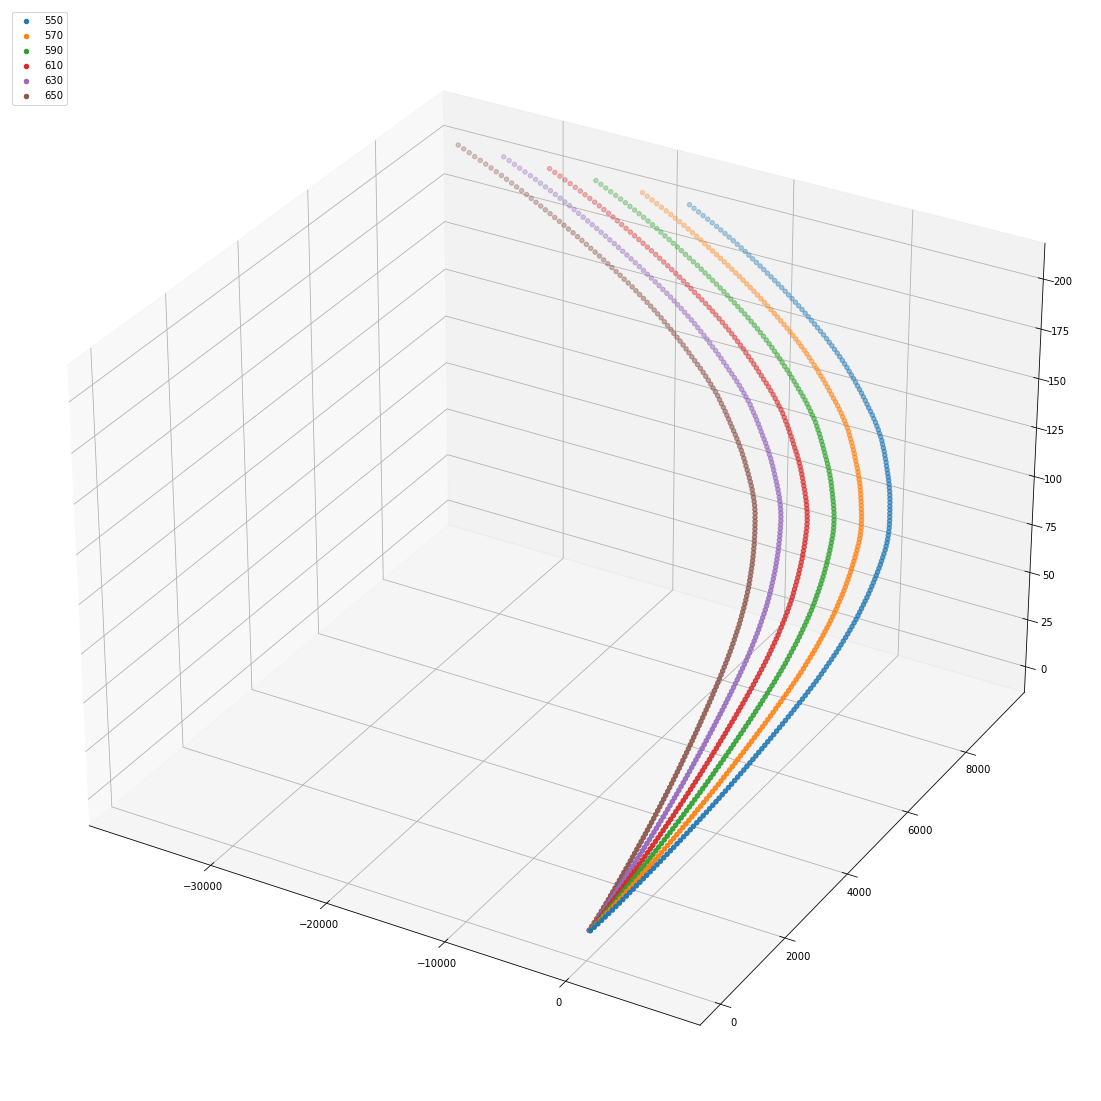

In [9]:
# Creamos la figura
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(111,projection='3d')
V=[550,570,590,610,630,650]
i=0
for resultado in Resultados:
    x,y,z,p= resultado
    # Agrrgamos un plano 3D
    ax1.scatter(y,z, x, label = V[i], marker='o')
    i=i+1
# Mostramos el gráfico
plt.legend(loc="upper left") 
plt.show()

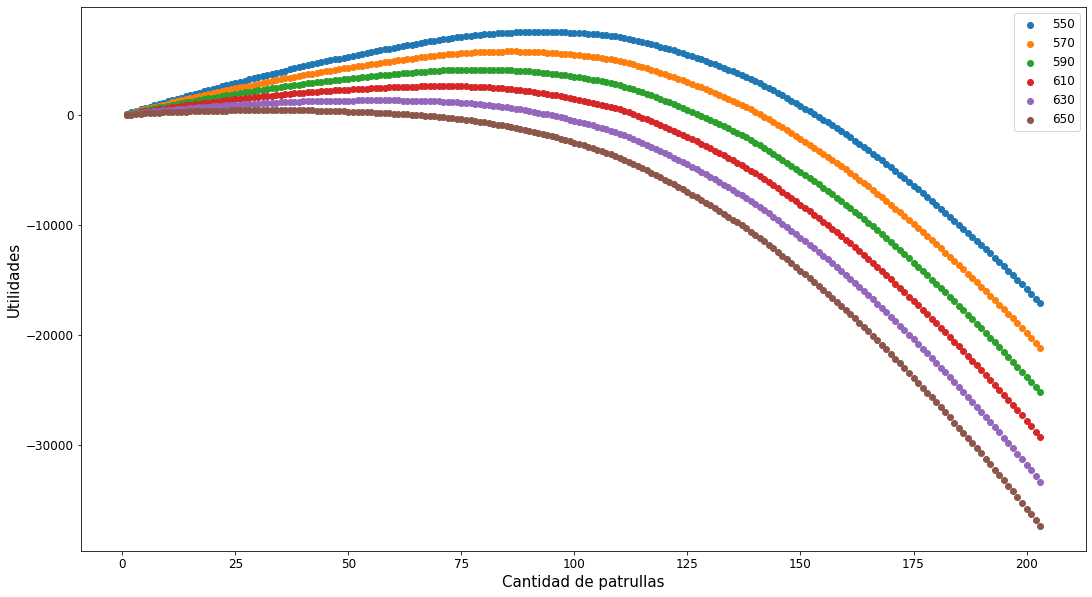

In [74]:
# Creamos la figura
fig, ax = plt.subplots(figsize=(18,10))

i=0
for resultado in Resultados:
    x,y,z,p =resultado
    ax.scatter( x,y,label =V[i], marker='o')
    i=i+1
plt.legend(loc=1, fontsize = 12) 
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
ax.set_xlabel("Cantidad de patrullas",fontdict = {'fontsize':15})
ax.set_ylabel("Utilidades",fontdict = {'fontsize':15})
# Mostramos el gráfico
plt.show()

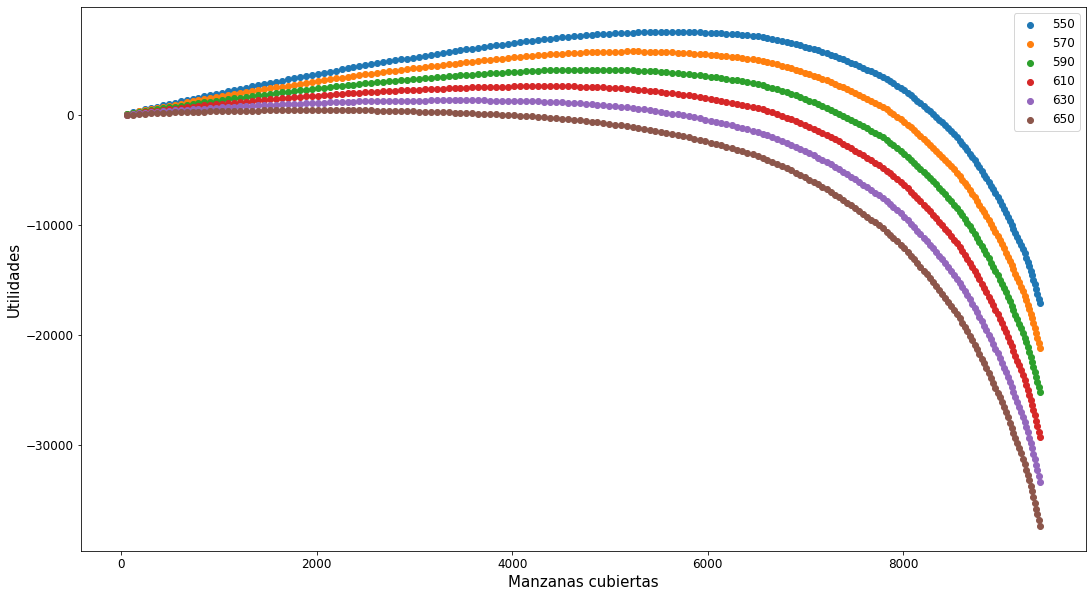

In [68]:
# Creamos la figura
fig, ax = plt.subplots(figsize=(18,10))

# Agrrgamos un plano 3D
i=0
for resultado in Resultados:
    x,y,z,p =resultado
    ax.scatter( z,y,label =V[i], marker='o')
    i=i+1
plt.legend(loc=1,fontsize = 12) 
ax.set_xlabel("Manzanas cubiertas",fontdict = {'fontsize':15})
ax.set_ylabel("Utilidades",fontdict = {'fontsize':15})

plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
# Mostramos el gráfico
plt.show()

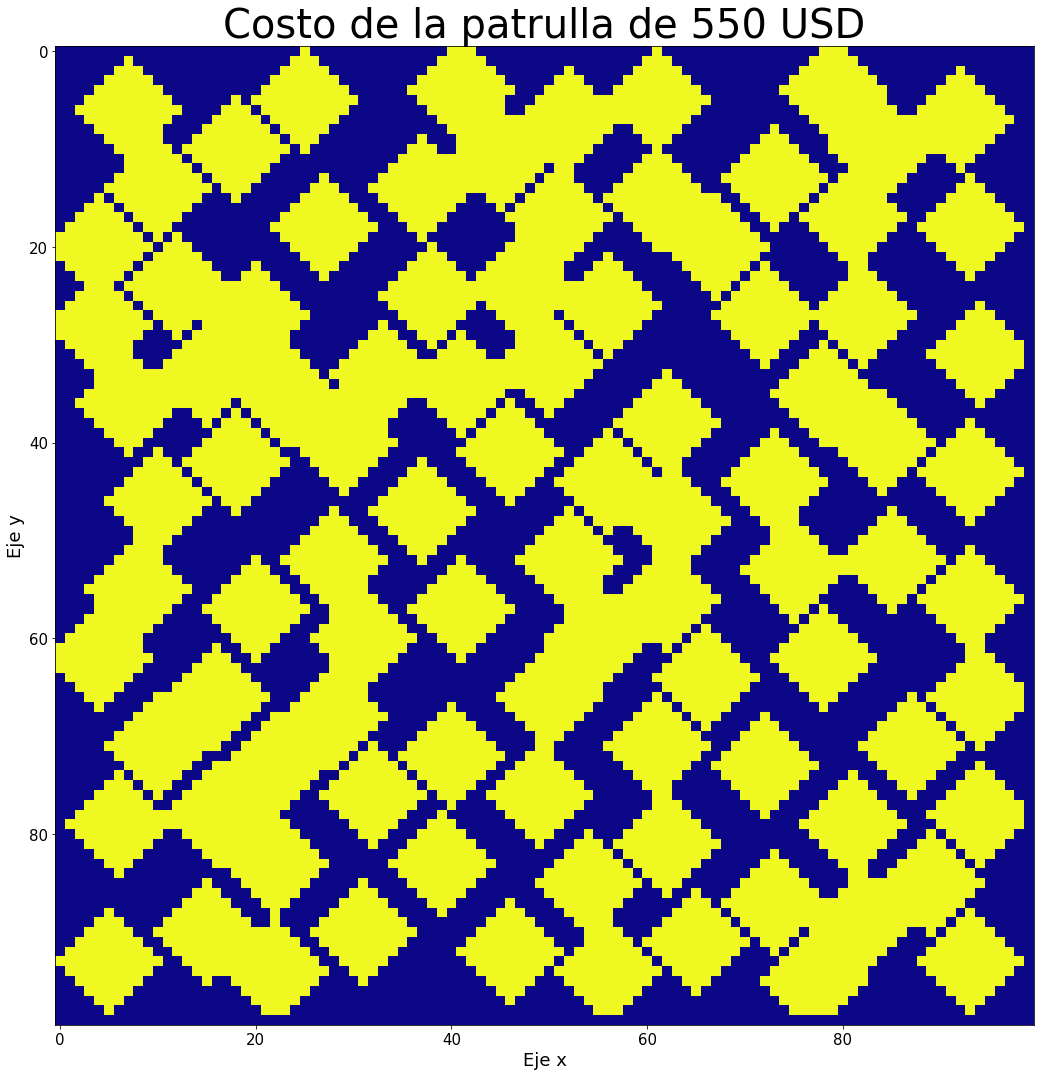

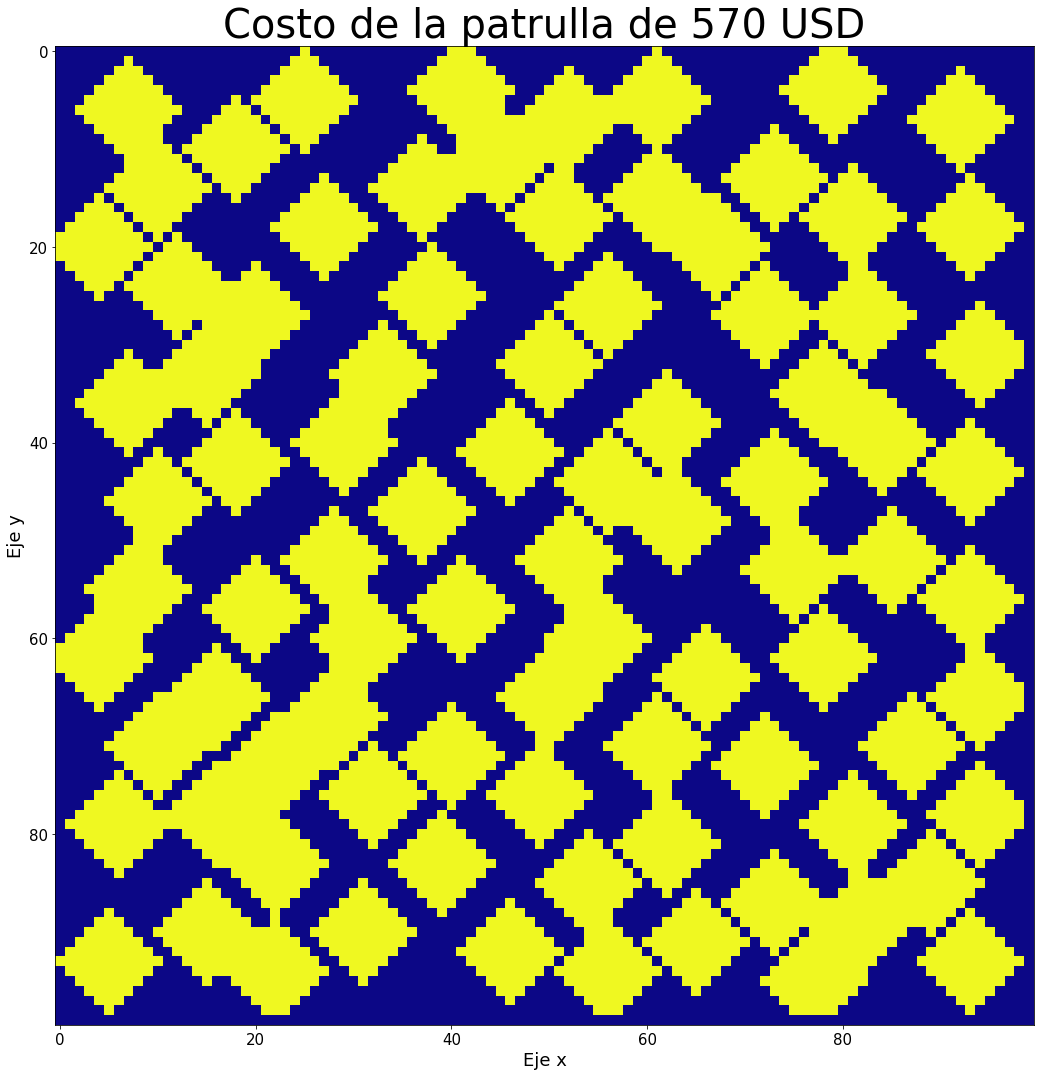

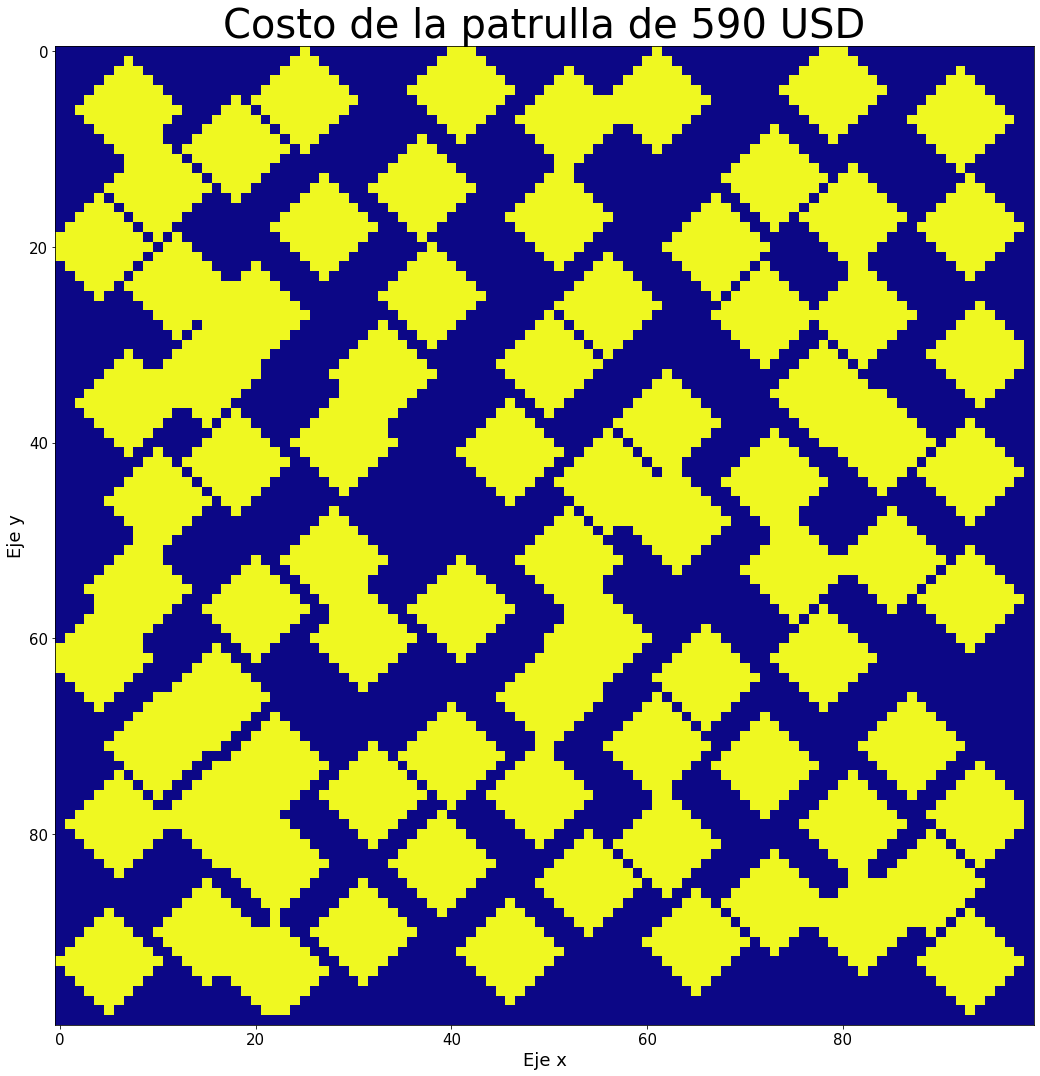

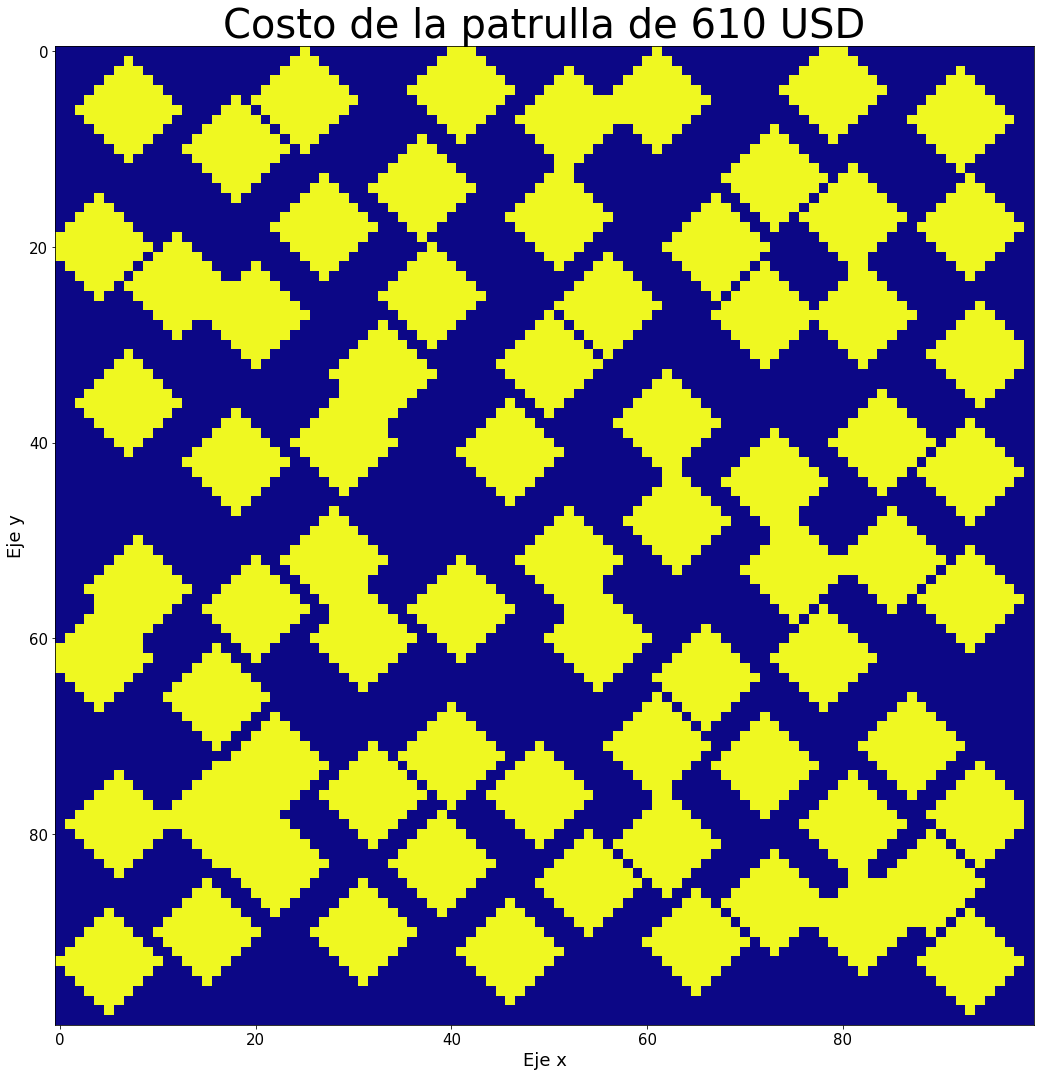

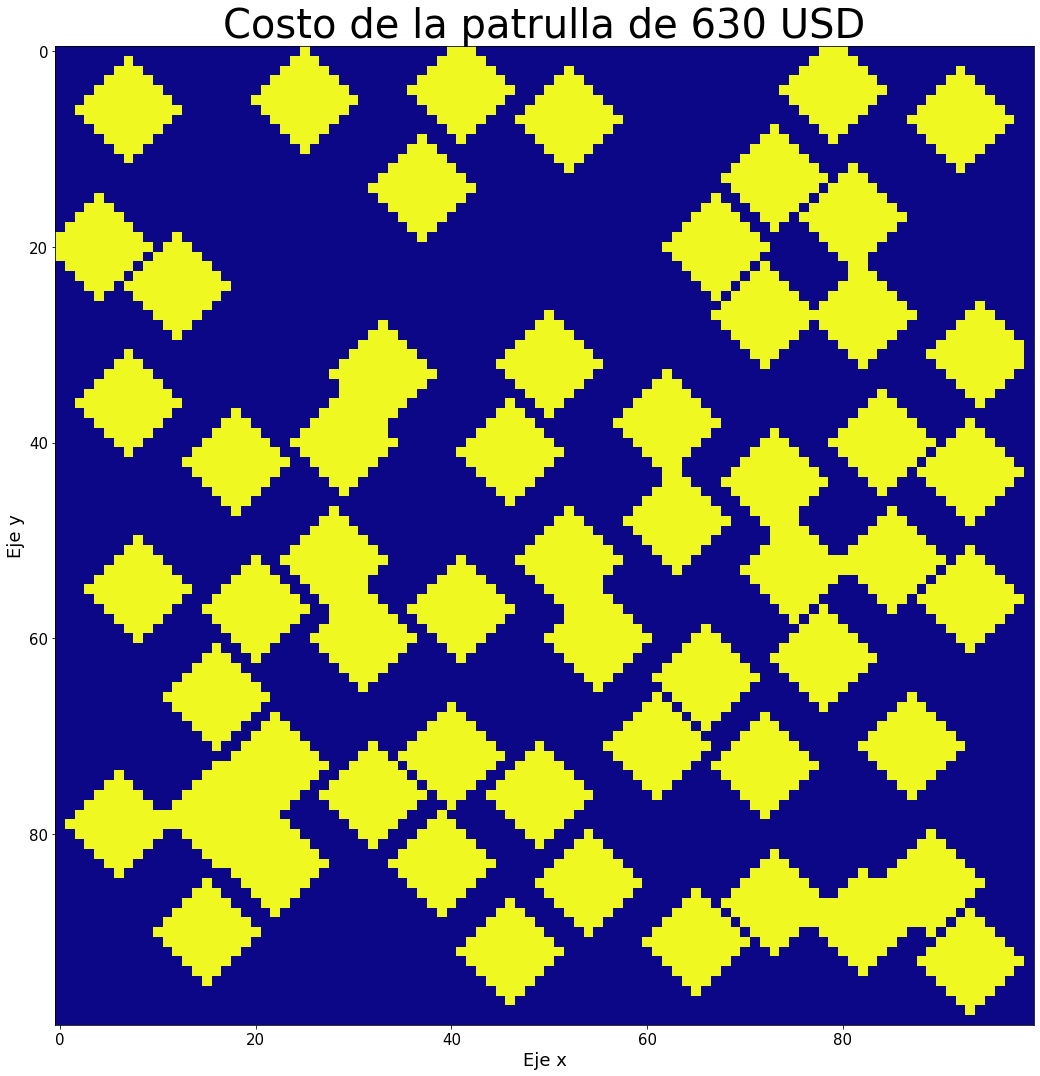

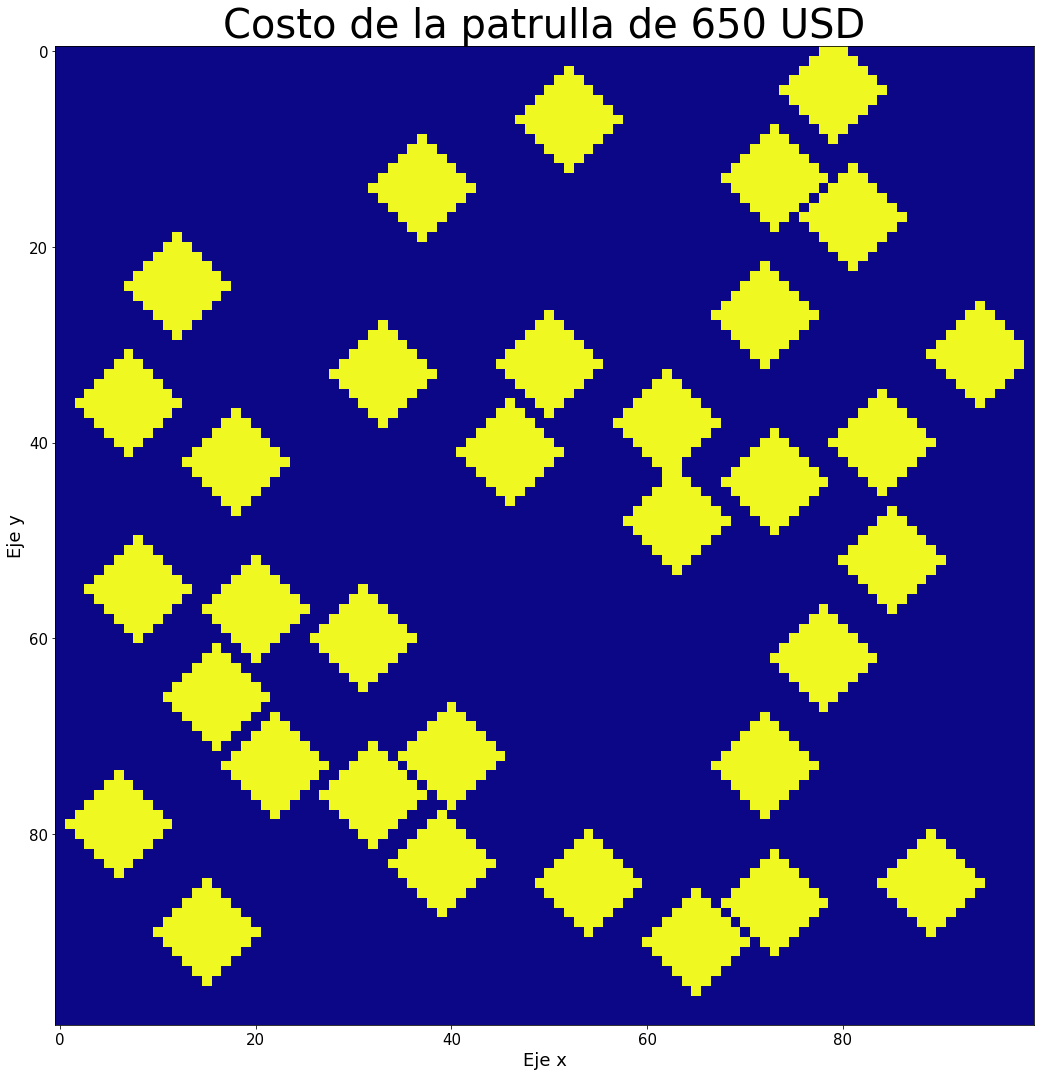

No handles with labels found to put in legend.


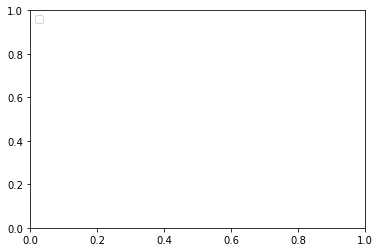

In [49]:
i=0
for resultado in Resultados:
    x,y,z,p =resultado
    grafica(p,V[i])
    i=i+1
plt.legend(loc="upper left") 
# Mostramos e

In [48]:
def grafica(mejorCubierto, Titulo):
    mt=[]
    mCostos=[]
    costos=0
    for i in range(100):
        linea=""
        M=[]
        MC=[]
        for j in range(100):
            linea=linea+str(matrix[(i,j)])+" "
            M.append(mejorCubierto[(j,i)])
            MC.append(matrix[(j,i)]*mejorCubierto[(j,i)])
            costos=matrix[(i,j)]*mejorCubierto[(i,j)]+costos
        mt.append(M)
        mCostos.append(MC)
    fig, ax = plt.subplots(figsize=(18,18))
    plt.imshow(mt,cmap="plasma")
    ax.set_xlabel("Eje x",fontdict = {'fontsize':18})
    ax.set_ylabel("Eje y",fontdict = {'fontsize':18})
    plt.xticks(fontsize = 15) 
    plt.yticks(fontsize = 15) 
    plt.title('Costo de la patrulla de '+str(Titulo)+ ' USD', fontsize = 40)
    plt.savefig("Convergencia.pdf",dpi=2000)
plt.show()
    plt.show()

In [54]:
porcentajeVisita=[]
i=0
for resultado in Resultados:
    x,y,z,p =resultado
    print(x)
    i=i+1
    a=0
    print(str(V[i])+""+str(a))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203]
5700
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,

IndexError: list index out of range